# Data analysis

## Setup

In [1]:
# Load packages
library(readxl)
library(dplyr)
library(ggplot2)
library(stats)
library(stargazer)
library(purrr)
library(stringr)
library(tidyverse)
library(lubridate)
library(lessR)
library(fixest)
library(sandwich)
library(lmtest)
library(car)
library(effsize)


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'dplyr'"

Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'stargazer'"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'purrr'"
Warning message in sprintf(gettext(fmt, domain = domain), ..

In [2]:
# Import the data
# Set the base directory path
base_directory <- "/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_management/" #nolint 

# Create a list of file names
file_names <- c(
    "editorial_playlists_23-24_final.csv",
    "editorial_playlists_22-23_final.csv",
    "editorial_playlists_21-22_final.csv",
    "major_playlists_23-24_final.csv",
    "major_playlists_22-23_final.csv",
    "major_playlists_21-22_final.csv"
)

# Modify the data frame
df_list <- list()

for (i in seq_along(file_names)) {
    file_name <- file_names[i]

    full_path <- file.path(base_directory, file_name)
    df <- read_csv(full_path)

    # Append the data frame to the list
    df_list[[i]] <- df
}

# Combine all data frames
df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)

# Export to Excel
write.csv(df, "df_final.csv")


Rows: 3171 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (5): playlist_id, playlist_name, playlist_type, stirling_index, stirlin...
dbl  (8): nb_tracks, nb_clusters, nb_clusters_2, hh_index, hh_index_2, dista...
dttm (2): collection_date, mean_track_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3172 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (5): playlist_id, playlist_name, playlist_type, stirling_index, stirlin...
dbl  (8): nb_tracks, nb_clusters, nb_clusters_2, hh_index, hh_index_2, dista...
dttm (2): collection_date, mean_track_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3233 Columns: 15
-- Column specification

## Data management

In [3]:
# Load data
df <- read.csv("df_final_bis.csv")


### Main measure

In [4]:
# Extract numeric values
df$diversity_clean <- as.numeric(gsub("[^[:digit:].-]", "", df$stirling_index))
df$diversity_clean

df$diversity_clean_2 <- as.numeric(
    gsub("[^[:digit:].-]", "", df$stirling_index_2)
)
df$diversity_clean_2

# Scale values
df$diversity_norm <- rescale(diversity_clean, df, kind = "z")
df$diversity_norm

df$diversity_norm_2 <- rescale(diversity_clean_2, df, kind = "z")
df$diversity_norm_2


[1] 0.19848049 0.13040538 0.12884873 0.13123587 0.12989972 0.13268050
    [7] 0.19362288 0.12828400 0.17319370 0.18876889 0.12813593 0.18609467
   [13] 0.16855395 0.16855395 0.12376825 0.12021549 0.17248166 0.12785125
   [19] 0.17276894 0.20207961 0.12865793 0.17405553 0.20569862 0.12566017
   [25] 0.20217412 0.20020806 0.16477364 0.19618565 0.16788963 0.11840328
   [31] 0.11686437 0.11748424 0.11948879 0.11927842 0.11778772 0.19464224
   [37] 0.11841120 0.21537275 0.21731450 0.16925459 0.12126733 0.19690439
   [43] 0.16778209 0.19699168 0.12047536 0.19680816 0.16701881 0.12006977
   [49] 0.19587647 0.19643046 0.12120425 0.11618457 0.16705918 0.16571709
   [55] 0.16567837 0.11787524 0.11856937 0.12081010 0.12242660 0.19205985
   [61] 0.19209101 0.18760387 0.12513437 0.12357245 0.20137373 0.20137373
   [67] 0.12325000 0.21852835 0.11947917 0.17719585 0.17880778 0.17691701
   [73] 0.11857209 0.11840250 0.17948534 0.11427354 0.11579578 0.12030721
   [79] 0.12193030 0.20932676 0.18227092 0.11912639 0.12173096 0.11999744
   [85] 0.11874445 0.11566217 0.14389715 0.14796773 0.14642694 0.11025918
   [91] 0.16710039 0.09112262 0.15311525 0.20979917 0.14910311 0.14614345
   [97] 0.14930496 0.10360883 0.18532603 0.14907718 0.14869513 0.09989984
  [103] 0.20171548 0.14936011 0.12197256 0.12060846 0.12319351 0.12538606
  [109] 0.14139733 0.10045163 0.09865746 0.16846591 0.11533955 0.16600071
  [115] 0.17000502 0.16739803 0.09767080 0.10356547 0.10356547 0.09840500
  [121] 0.09657663 0.10366772 0.11210481 0.10681009 0.10606648 0.15268424
  [127] 0.10404657 0.16090380 0.15829443 0.20851001 0.15830316 0.18588735
  [133] 0.10449157 0.10691505 0.09863520 0.15680161 0.09988447 0.15284861
  [139] 0.10044521 0.09938378 0.09954848 0.21229732 0.12429388 0.17965186
  [145] 0.21065479 0.12007142 0.17779838 0.12299726 0.21121075 0.12084154
  [151] 0.12084154 0.12084154 0.18148315 0.12313757 0.10800478 0.16322802
  [157] 0.11432391 0.23652525 0.20011100 0.13403447 0.13270879 0.13270879
  [163] 0.13270879 0.13270879 0.13270879 0.13270879 0.13270879 0.13183418
  [169] 0.19959337 0.19959337 0.23418950 0.13215914 0.13215914 0.13215914
  [175] 0.13212751 0.13212751 0.13212751 0.13212751 0.23335640 0.23335640
  [181] 0.23335640 0.19729345 0.23335640 0.13219423 0.13129869 0.13129869
  [187] 0.19727260 0.19727260 0.13015397 0.23304483 0.13015397 0.13015397
  [193] 0.13015397 0.13015397 0.12952715 0.13058719 0.13058719 0.13058719
  [199] 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719
  [205] 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719 0.13058719
  [211] 0.19621875 0.13158470 0.13158470 0.13158470 0.19494718 0.13158470
  [217] 0.13158470 0.13158470 0.19494718 0.19494718 0.13158470 0.23206372
  [223] 0.23206372 0.23206372 0.19413049 0.19413049 0.19413049 0.19413049
  [229] 0.13051464 0.19148864 0.19235539 0.19235539 0.19235539 0.19235539
  [235] 0.13094514 0.19019841 0.19019841 0.19019841 0.19019841 0.19019841
  [241] 0.19019841 0.19019841 0.19019841 0.19019841 0.19019841 0.19019841
  [247] 0.19019841 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886
  [253] 0.22553886 0.22553886 0.22553886 0.13000213 0.22553886 0.22553886
  [259] 0.22553886 0.22553886 0.19032114 0.19032114 0.19032114 0.19032114
  [265] 0.19032114 0.19032114 0.22594329 0.22594329 0.13239957 0.13239957
  [271] 0.22152203 0.22152203 0.22152203 0.22152203 0.13374311 0.22152203
  [277] 0.22152203 0.19668445 0.19668445 0.19668445 0.13377759 0.19668445
  [283] 0.13377759 0.19668445 0.13377759 0.19668445 0.19668445 0.13377759
  [289] 0.19668445 0.13348547 0.13348547 0.13348547 0.19657123 0.13441444
  [295] 0.19657123 0.19657123 0.19657123 0.19657123 0.13508509 0.19505635
  [301] 0.19505635 0.19505635 0.13405129 0.19505635 0.19505635 0.19505635
  [307] 0.19505635 0.19505635 0.19505635 0.19505635 0.19505635 0.19505635
  [313] 0.19471437 0.19471437 0.16828362 0.11059028 0.16764267 0.11184084
  [319] 0.11139006 0.16558086 0.16537554 0.11359176 0.11359176 0.11291256
  [325] 

[1] 0.29769668 0.29858228 0.28702486 0.29649178 0.27389869 0.27482830
    [7] 0.26252387 0.26835133 0.26163608 0.27849354 0.28212711 0.28008043
   [13] 0.24231309 0.24231309 0.25788165 0.25685195 0.24029423 0.20078097
   [19] 0.24225742 0.26534391 0.23711885 0.26606463 0.24604774 0.27142186
   [25] 0.26022261 0.23743607 0.25465584 0.25196922 0.24561343 0.24629678
   [31] 0.23674970 0.24355798 0.22602079 0.25667507 0.25684153 0.21393273
   [37] 0.25601614 0.21537275 0.24212873 0.24285984 0.21563664 0.24897212
   [43] 0.21626632 0.26077279 0.22935482 0.25462110 0.25462110 0.25465992
   [49] 0.22961358 0.23172703 0.25726969 0.26479487 0.25208084 0.21736282
   [55] 0.25352268 0.21820850 0.25204488 0.24807427 0.26597374 0.28613677
   [61] 0.27110787 0.25164245 0.28088822 0.26711069 0.26883871 0.26883871
   [67] 0.24697266 0.26135592 0.27070385 0.24979433 0.27567460 0.26861774
   [73] 0.26771973 0.27180939 0.26483224 0.26220236 0.26333942 0.25956174
   [79] 0.26763595 0.28041686 0.28125308 0.27600914 0.23292671 0.28352157
   [85] 0.28216584 0.26265132 0.25175034 0.25174513 0.24182533 0.24180345
   [91] 0.26975585 0.25172797 0.23585006 0.25685482 0.23249024 0.23166335
   [97] 0.24203898 0.22231236 0.25470268 0.25470268 0.25168444 0.21628264
  [103] 0.25014944 0.23792796 0.26664712 0.25273484 0.22480782 0.27167381
  [109] 0.24859443 0.23751046 0.22718307 0.27207590 0.26234346 0.27240351
  [115] 0.27600857 0.22650435 0.26687852 0.26317201 0.24296281 0.27297801
  [121] 0.25690593 0.24218598 0.27073193 0.23276778 0.24212009 0.24732239
  [127] 0.23898102 0.23970377 0.20938908 0.23192950 0.23612156 0.18588735
  [133] 0.22015857 0.23465665 0.22175856 0.24846077 0.24116246 0.15284861
  [139] 0.22694856 0.23259023 0.21185696 0.27284001 0.25660805 0.26646871
  [145] 0.26648587 0.27128181 0.27702244 0.26453674 0.21121075 0.26502116
  [151] 0.28029271 0.26502116 0.28218737 0.29244661 0.24056785 0.28175076
  [157] 0.28010903 0.30771922 0.27503147 0.29226258 0.25743416 0.13270879
  [163] 0.13270879 0.13270879 0.25743416 0.25743416 0.25743416 0.29956627
  [169] 0.29682713 0.30579038 0.30579038 0.30579038 0.27548422 0.29682713
  [175] 0.29268270 0.29268270 0.29268270 0.29268270 0.26741186 0.26741186
  [181] 0.26741186 0.26741186 0.26741186 0.27175882 0.27226998 0.27226998
  [187] 0.29605169 0.29605169 0.26800111 0.26800111 0.30998139 0.26800111
  [193] 0.26800111 0.26800111 0.29465298 0.28454429 0.28454429 0.28454429
  [199] 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429
  [205] 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429 0.28454429
  [211] 0.29901277 0.29514979 0.29514979 0.29514979 0.29514979 0.29514979
  [217] 0.29514979 0.29514979 0.29514979 0.29514979 0.29514979 0.30752438
  [223] 0.23206372 0.23206372 0.28146104 0.24849470 0.24849470 0.24849470
  [229] 0.28279988 0.28279988 0.29518326 0.29518326 0.29518326 0.29518326
  [235] 0.29518326 0.29959785 0.29959785 0.29959785 0.29959785 0.29959785
  [241] 0.29959785 0.29959785 0.29959785 0.29959785 0.29959785 0.29959785
  [247] 0.29959785 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886
  [253] 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886 0.22553886
  [259] 0.22553886 0.22553886 0.28125782 0.28125782 0.28125782 0.28125782
  [265] 0.28125782 0.28125782 0.28125782 0.28125782 0.24993502 0.24993502
  [271] 0.27318112 0.27318112 0.27318112 0.27318112 0.27318112 0.27318112
  [277] 0.27318112 0.28937838 0.28937838 0.31338382 0.28937838 0.31338382
  [283] 0.28937838 0.31338382 0.28937838 0.28937838 0.28937838 0.31338382
  [289] 0.28937838 0.21965723 0.27537884 0.28982891 0.28197755 0.28197755
  [295] 0.28197755 0.28197755 0.28197755 0.28197755 0.26797849 0.30912803
  [301] 0.26315614 0.30912803 0.26315614 0.30912803 0.26315614 0.26315614
  [307] 0.30912803 0.30912803 0.26315614 0.30912803 0.26315614 0.26315614
  [313] 0.30897444 0.30897444 0.26558641 0.20303520 0.26745662 0.21684479
  [319] 0.26000417 0.23868860 0.25557536 0.25583245 0.25583245 0.23506881
  [325] 

[1]  0.344 -0.942 -0.971 -0.926 -0.951 -0.899  0.252 -0.982 -0.134  0.161
   [11] -0.985  0.110 -0.221 -0.221 -1.067 -1.134 -0.147 -0.990 -0.142  0.412
   [21] -0.975 -0.117  0.480 -1.031  0.414  0.377 -0.293  0.301 -0.234 -1.168
   [31] -1.197 -1.186 -1.148 -1.152 -1.180  0.272 -1.168  0.663  0.700 -0.208
   [41] -1.114  0.314 -0.236  0.316 -1.129  0.312 -0.250 -1.137  0.295  0.305
   [51] -1.116 -1.210 -0.249 -0.275 -0.275 -1.178 -1.165 -1.123 -1.092  0.223
   [61]  0.223  0.139 -1.041 -1.071  0.399  0.399 -1.077  0.723 -1.148 -0.058
   [71] -0.027 -0.063 -1.165 -1.168 -0.015 -1.246 -1.218 -1.132 -1.102  0.549
   [81]  0.038 -1.155 -1.106 -1.138 -1.162 -1.220 -0.687 -0.610 -0.639 -1.322
   [91] -0.249 -1.684 -0.513  0.558 -0.589 -0.644 -0.585 -1.448  0.096 -0.589
  [101] -0.596 -1.518  0.405 -0.584 -1.101 -1.127 -1.078 -1.037 -0.734 -1.507
  [111] -1.541 -0.223 -1.226 -0.269 -0.194 -0.243 -1.560 -1.449 -1.449 -1.546
  [121] -1.581 -1.447 -1.287 -1.387 -1.401 -0.521 -1.440 -0.366 -0.415  0.534
  [131] -0.415  0.106 -1.431 -1.385 -1.542 -0.443 -1.518 -0.518 -1.508 -1.528
  [141] -1.525  0.605 -1.057 -0.012  0.574 -1.137 -0.047 -1.082  0.585 -1.122
  [151] -1.122 -1.122  0.023 -1.079 -1.365 -0.322 -1.245  1.063  0.375 -0.873
  [161] -0.898 -0.898 -0.898 -0.898 -0.898 -0.898 -0.898 -0.915  0.365  0.365
  [171]  1.019 -0.909 -0.909 -0.909 -0.909 -0.909 -0.909 -0.909  1.003  1.003
  [181]  1.003  0.322  1.003 -0.908 -0.925 -0.925  0.321  0.321 -0.946  0.997
  [191] -0.946 -0.946 -0.946 -0.946 -0.958 -0.938 -0.938 -0.938 -0.938 -0.938
  [201] -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938 -0.938
  [211]  0.301 -0.919 -0.919 -0.919  0.277 -0.919 -0.919 -0.919  0.277  0.277
  [221] -0.919  0.978  0.978  0.978  0.262  0.262  0.262  0.262 -0.940  0.212
  [231]  0.228  0.228  0.228  0.228 -0.932  0.188  0.188  0.188  0.188  0.188
  [241]  0.188  0.188  0.188  0.188  0.188  0.188  0.188  0.855  0.855  0.855
  [251]  0.855  0.855  0.855  0.855  0.855 -0.949  0.855  0.855  0.855  0.855
  [261]  0.190  0.190  0.190  0.190  0.190  0.190  0.863  0.863 -0.904 -0.904
  [271]  0.779  0.779  0.779  0.779 -0.879  0.779  0.779  0.310  0.310  0.310
  [281] -0.878  0.310 -0.878  0.310 -0.878  0.310  0.310 -0.878  0.310 -0.884
  [291] -0.884 -0.884  0.308 -0.866  0.308  0.308  0.308  0.308 -0.853  0.279
  [301]  0.279  0.279 -0.873  0.279  0.279  0.279  0.279  0.279  0.279  0.279
  [311]  0.279  0.279  0.273  0.273 -0.226 -1.316 -0.238 -1.292 -1.301 -0.277
  [321] -0.281 -1.259 -1.259 -1.272 -1.277 -1.464 -1.513 -1.513 -1.513 -0.637
  [331] -1.547 -0.636 -1.579 -1.381 -1.381 -1.407 -0.384 -1.380 -0.371 -1.379
  [341] -0.396 -0.391  1.089 -1.463  0.137 -1.467 -1.514 -1.374 -0.251 -1.331
  [351] -0.300 -0.300 -1.341 -1.341 -1.478 -1.478 -1.478 -1.478 -1.478 -1.478
  [361] -1.478 -1.478 -1.583 -1.599 -0.404 -1.471 -0.447 -0.468 -0.429 -1.397
  [371] -1.411 -0.452 -0.415 -1.387 -1.375 -1.382 -0.420 -0.448 -0.435 -0.435
  [381] -0.435 -1.334 -1.358 -1.359 -0.450 -0.450 -0.473 -0.527 -0.498 -0.457
  [391] -0.463  0.041 -0.523 -0.324 -1.389 -1.368 -1.382 -1.357 -1.288 -1.276
  [401] -1.233 -1.325 -1.323 -0.295 -1.319 -1.288 -1.515 -1.518 -1.517 -1.560
  [411] -0.314 -1.367 -1.405 -1.405 -1.405 -0.315 -1.337 -1.320 -1.358 -0.293
  [421] -0.315 -0.315 -1.356 -1.363 -1.402 -1.313 -1.233 -1.181 -0.344 -1.187
  [431] -1.133 -1.176 -1.176 -0.292 -1.253 -1.214 -0.223 -0.243 -1.317 -1.402
  [441] -1.487 -1.487 -1.723 -1.801 -0.515 -0.537 -1.493 -1.493  0.083 -0.186
  [451] -1.208 -0.149 -0.171 -0.207 -1.262 -1.278 -1.182 -1.156 -1.171 -1.202
  [461] -1.177 -0.306 -0.326 -0.313 -0.313 -0.313 -0.313 -0.290 -0.303 -0.258
  [471] -0.247 -1.177  0.328 -0.134  0.328  0.328 -0.134  0.328  0.328 -0.134
  [481] -0.134  0.328  0.328 -0.134 -0.134 -0.134 -0.134 -0.134 -1.167 -1.167
  [491] -1.167 -1.167 -1.167 -1.167 -1.167 -0.142 -1.167 -1.167 -1.167 -1.167
  [501] -1.167  0.311  0.311  0.311  0.311 -1.181  0.311  0.311 -1.181  0.311
  [511]  0.311  0.311  0.3

[1] -0.067 -0.048 -0.288 -0.092 -0.559 -0.540 -0.794 -0.674 -0.813 -0.464
   [11] -0.389 -0.431 -1.213 -1.213 -0.890 -0.912 -1.254 -2.072 -1.214 -0.736
   [21] -1.320 -0.721 -1.135 -0.610 -0.842 -1.313 -0.957 -1.013 -1.144 -1.130
   [31] -1.328 -1.187 -1.550 -0.915 -0.912 -1.800 -0.929 -1.770 -1.216 -1.201
   [41] -1.764 -1.075 -1.751 -0.831 -1.481 -0.958 -0.958 -0.957 -1.475 -1.431
   [51] -0.903 -0.747 -1.010 -1.729 -0.981 -1.711 -1.011 -1.093 -0.723 -0.306
   [61] -0.617 -1.020 -0.415 -0.700 -0.664 -0.664 -1.116 -0.819 -0.625 -1.058
   [71] -0.522 -0.668 -0.687 -0.602 -0.747 -0.801 -0.778 -0.856 -0.689 -0.424
   [81] -0.407 -0.515 -1.407 -0.360 -0.388 -0.792 -1.017 -1.017 -1.223 -1.223
   [91] -0.645 -1.018 -1.346 -0.912 -1.416 -1.433 -1.218 -1.626 -0.956 -0.956
  [101] -1.019 -1.751 -1.050 -1.303 -0.709 -0.997 -1.575 -0.605 -1.083 -1.312
  [111] -1.525 -0.597 -0.798 -0.590 -0.515 -1.540 -0.704 -0.781 -1.199 -0.578
  [121] -0.911 -1.215 -0.625 -1.410 -1.216 -1.109 -1.281 -1.266 -1.894 -1.427
  [131] -1.341 -2.380 -1.671 -1.371 -1.638 -1.085 -1.236 -3.063 -1.530 -1.414
  [141] -1.843 -0.581 -0.917 -0.713 -0.712 -0.613 -0.494 -0.753 -1.856 -0.743
  [151] -0.427 -0.743 -0.388 -0.175 -1.249 -0.397 -0.431  0.141 -0.536 -0.179
  [161] -0.900 -3.480 -3.480 -3.480 -0.900 -0.900 -0.900 -0.028 -0.085  0.101
  [171]  0.101  0.101 -0.526 -0.085 -0.171 -0.171 -0.171 -0.171 -0.693 -0.693
  [181] -0.693 -0.693 -0.693 -0.603 -0.593 -0.593 -0.101 -0.101 -0.681 -0.681
  [191]  0.187 -0.681 -0.681 -0.681 -0.130 -0.339 -0.339 -0.339 -0.339 -0.339
  [201] -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339 -0.339
  [211] -0.040 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120 -0.120
  [221] -0.120  0.136 -1.425 -1.425 -0.403 -1.085 -1.085 -1.085 -0.375 -0.375
  [231] -0.119 -0.119 -0.119 -0.119 -0.119 -0.027 -0.027 -0.027 -0.027 -0.027
  [241] -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -1.560 -1.560 -1.560
  [251] -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560 -1.560
  [261] -0.407 -0.407 -0.407 -0.407 -0.407 -0.407 -0.407 -0.407 -1.055 -1.055
  [271] -0.574 -0.574 -0.574 -0.574 -0.574 -0.574 -0.574 -0.239 -0.239  0.258
  [281] -0.239  0.258 -0.239  0.258 -0.239 -0.239 -0.239  0.258 -0.239 -1.681
  [291] -0.528 -0.230 -0.392 -0.392 -0.392 -0.392 -0.392 -0.392 -0.682  0.170
  [301] -0.781  0.170 -0.781  0.170 -0.781 -0.781  0.170  0.170 -0.781  0.170
  [311] -0.781 -0.781  0.166  0.166 -0.731 -2.025 -0.692 -1.739 -0.847 -1.287
  [321] -0.938 -0.933 -0.933 -1.362 -0.849 -1.041 -2.415 -1.252 -1.252 -1.508
  [331] -1.259 -1.312 -1.142 -1.821 -1.309 -0.805 -1.446 -1.446 -1.257 -0.792
  [341] -1.295 -1.080  0.272  0.050 -0.094 -0.195 -0.750 -0.348 -2.771 -0.503
  [351] -0.477 -0.477 -0.477 -0.477 -0.560 -0.684 -0.560 -0.560 -0.560 -0.628
  [361] -0.628 -0.628 -0.891 -1.346 -1.324 -0.880 -1.039 -1.372 -0.803 -1.203
  [371] -1.167 -0.909 -0.939 -0.926 -1.605 -0.932 -1.196 -1.108 -0.950 -0.950
  [381] -0.950 -1.052 -1.089 -1.147 -1.229 -1.229 -1.635 -1.067 -1.268 -1.244
  [391] -1.569 -1.423 -1.306 -0.964 -0.905 -0.781 -1.187 -0.847 -0.937 -0.749
  [401] -0.926 -0.620 -0.574 -0.808 -0.951 -0.668 -1.017 -0.597 -1.285 -1.023
  [411] -0.685 -0.685 -0.596 -0.596 -0.596 -0.705 -0.651 -0.896 -1.269 -0.860
  [421] -1.124 -1.124 -1.196 -1.155 -4.032 -1.319 -0.736 -0.622 -0.652 -0.743
  [431] -0.689 -1.137 -1.584 -1.270 -1.042 -1.227 -2.055 -0.827 -1.423 -0.991
  [441] -1.066 -0.811 -0.978 -0.888 -1.283 -1.041 -1.845 -1.487 -1.851 -0.737
  [451] -1.542 -0.598 -1.525 -0.518 -0.757 -0.648 -0.598 -0.537 -0.470 -0.722
  [461] -1.521 -1.534 -0.517 -0.523 -0.523 -0.523 -0.523 -0.721 -0.868 -1.600
  [471] -0.489 -0.860 -0.833 -0.833 -0.833 -0.833 -0.961 -0.833 -0.833 -0.833
  [481] -0.833 -0.833 -0.833 -0.833 -0.833 -1.233 -0.833 -0.833 -1.213 -1.213
  [491] -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213 -1.213
  [501] -1.213 -1.083 -1.083 -1.083 -1.083 -0.939 -0.939 -0.939 -1.083 -0.939
  [511] -1.083 -0.939 -1.0

### Secondary measures

In [5]:
# HH-Index
# Scale values
df$hhi_norm <- rescale(hh_index, df, kind = "z")
df$hhi_norm

df$hhi_norm_2 <- rescale(hh_index_2, df, kind = "z")
df$hhi_norm_2


[1] -1.040  0.434  0.439  0.386  0.390  0.404 -0.914  0.481 -1.023 -1.015
   [11]  0.386 -1.006 -1.002 -1.002  0.387  0.474 -0.804  0.405 -0.700 -1.528
   [21]  0.435 -0.714 -1.688  0.399 -1.499 -1.518 -0.660 -1.679 -1.054  0.419
   [31]  0.429  0.437  0.448  0.462  0.494 -1.713  0.515 -2.120 -1.997 -0.946
   [41]  0.429 -1.711 -0.995 -1.745  0.397 -1.735 -0.978  0.389 -1.746 -1.732
   [51]  0.386  0.828 -0.974 -0.744 -0.838  0.567  0.539  0.608  0.589 -1.019
   [61] -1.031 -1.011  0.550  0.611 -1.464 -1.464  0.891 -1.948  0.631 -1.042
   [71] -0.867 -0.871  0.698  0.689 -0.936  0.679  0.710  0.408  0.704 -1.735
   [81] -0.946  1.057  0.848  0.700  0.656  0.608 -0.159 -0.600 -0.669  0.641
   [91] -1.025  1.585 -0.616 -1.924 -0.523 -0.418 -0.523  0.686 -1.613 -0.526
  [101] -0.581  0.867 -1.895 -0.581  0.386  0.468  0.397  0.402 -0.313  0.439
  [111]  0.508 -0.797  0.553 -0.469 -0.766 -0.651  1.233  1.399  1.399  1.468
  [121]  1.964  1.202  0.580  0.849  0.884 -0.880  0.804 -0.702 -0.797 -1.994
  [131] -0.909 -1.487  0.826  0.775  1.066 -0.623  1.164 -0.840  0.911  0.910
  [141]  0.895 -1.617  0.449 -1.028 -1.703  0.441 -0.943  0.410 -1.750  0.435
  [151]  0.435  0.435 -1.023  0.526  1.253 -0.631  0.803 -1.745 -1.043  0.436
  [161]  0.424  0.424  0.424  0.424  0.424  0.424  0.424  0.434 -1.048 -1.048
  [171] -1.748  0.457  0.457  0.457  0.448  0.448  0.448  0.448 -1.754 -1.754
  [181] -1.754 -1.050 -1.754  0.431  0.442  0.442 -1.038 -1.038  0.492 -1.709
  [191]  0.492  0.492  0.492  0.492  0.506  0.487  0.487  0.487  0.487  0.487
  [201]  0.487  0.487  0.487  0.487  0.487  0.487  0.487  0.487  0.487  0.487
  [211] -1.004  0.437  0.437  0.437 -1.001  0.437  0.437  0.437 -1.001 -1.001
  [221]  0.437 -1.709 -1.709 -1.709 -1.027 -1.027 -1.027 -1.027  0.452 -0.975
  [231] -1.016 -1.016 -1.016 -1.016  0.463 -0.964 -0.964 -0.964 -0.964 -0.964
  [241] -0.964 -0.964 -0.964 -0.964 -0.964 -0.964 -0.964 -1.706 -1.706 -1.706
  [251] -1.706 -1.706 -1.706 -1.706 -1.706  0.459 -1.706 -1.706 -1.706 -1.706
  [261] -0.964 -0.964 -0.964 -0.964 -0.964 -0.964 -1.727 -1.727  0.497  0.497
  [271] -1.363 -1.363 -1.363 -1.363  0.466 -1.363 -1.363 -1.020 -1.020 -1.020
  [281]  0.450 -1.020  0.450 -1.020  0.450 -1.020 -1.020  0.450 -1.020  0.437
  [291]  0.437  0.437 -1.005  0.425 -1.005 -1.005 -1.005 -1.005  0.415 -0.995
  [301] -0.995 -0.995  0.395 -0.995 -0.995 -0.995 -0.995 -0.995 -0.995 -0.995
  [311] -0.995 -0.995 -0.993 -0.993 -0.954  0.498 -0.920  0.386  0.389 -0.897
  [321] -0.839  0.395  0.395  0.388  0.386  0.525  0.637  0.637  0.637 -0.725
  [331]  0.554 -0.747  0.627  0.386  0.386  0.394 -1.020  0.389 -1.021  0.388
  [341] -1.014 -1.018 -1.389  1.918 -0.859  1.658  1.709  0.911 -0.877  0.449
  [351] -0.823 -0.823  0.470  0.470  0.970  0.970  0.970  0.970  0.970  0.970
  [361]  0.970  0.970  1.302  1.323 -0.676  0.983 -0.683 -0.712 -0.796  0.429
  [371]  0.443 -0.932 -0.990  0.386  0.386  0.388 -0.958 -0.952 -0.934 -0.934
  [381] -0.934  0.387  0.401  0.404 -0.956 -0.956 -0.898 -0.857 -0.882 -0.901
  [391] -0.861 -1.468 -0.889 -0.979  0.637  0.446  0.521  0.390  0.489  0.431
  [401]  0.501  0.559  0.517 -0.784  0.416  0.408  1.258  1.258  1.202  1.323
  [411] -0.932  0.388  0.641  0.641  0.641 -0.837  0.471  0.422  0.537 -0.640
  [421] -0.871 -0.871  0.482  0.446  0.613  0.426  0.410  0.388 -0.467  0.635
  [431]  0.390  0.388  0.388 -0.689  0.386  0.388 -0.876 -0.862  0.400  0.579
  [441]  0.686  0.686  1.541  1.793 -0.613 -0.630  0.587  0.587 -1.185 -1.048
  [451]  0.394 -1.055 -1.036 -1.034  0.389  0.391  0.402  0.386  0.594  0.586
  [461]  0.541 -0.482 -0.468 -0.468 -0.468 -0.468 -0.468 -0.463 -0.468 -0.633
  [471] -0.601  0.415 -1.520 -0.982 -1.520 -1.520 -0.982 -1.520 -1.520 -0.982
  [481] -0.982 -1.520 -1.520 -0.982 -0.982 -0.982 -0.982 -0.982  0.418  0.418
  [491]  0.418  0.418  0.418  0.418  0.418 -0.927  0.418  0.418  0.418  0.418
  [501]  0.418 -1.483 -1.483 -1.483 -1.483  0.416 -1.483 -1.483  0.416 -1.483
  [511] -1.483 -1.483 -1.4

[1] -0.618 -0.912 -0.808 -0.952 -0.194 -0.260  0.041 -0.850 -0.880 -0.932
   [11] -1.087 -1.114 -0.437 -0.437 -0.926 -0.982 -0.195  1.296 -0.130 -0.983
   [21] -0.150 -1.054 -0.221 -1.108 -0.774 -0.103 -1.003 -0.959 -0.703 -0.663
   [31] -0.474 -0.751  0.010 -1.104 -1.090  0.533 -0.878  0.521 -0.321 -0.473
   [41]  0.750 -0.710  0.729 -1.088 -0.003 -0.807 -0.807 -0.935 -0.002 -0.080
   [51] -0.886 -1.094 -0.630  0.798 -0.655  0.774 -0.665  0.132 -0.550 -1.073
   [61] -0.516  0.081 -1.119 -1.181 -1.173 -1.173 -0.423 -0.924 -1.034 -0.360
   [71] -0.963 -0.851 -0.815 -1.118 -0.908 -1.149 -1.165 -0.906 -0.932 -0.858
   [81] -0.876 -0.668  0.509 -0.909 -1.074 -0.492 -0.602 -1.050 -0.717 -0.201
   [91] -1.026 -0.850 -0.145 -1.020 -0.095 -0.116 -0.562  0.042 -1.103 -1.103
  [101] -0.930  0.277 -1.030 -0.647 -0.606 -0.033  0.870 -1.016 -0.890 -0.526
  [111] -0.157 -1.010 -0.677 -0.748 -0.758  1.030 -0.888 -0.518  0.072 -0.993
  [121] -0.447  0.170 -0.990 -0.363 -0.704 -1.058 -0.327 -0.200  0.894 -0.144
  [131] -0.428  1.710  0.238 -0.123  0.082 -0.706 -0.703  2.925 -0.203 -0.422
  [141]  0.564 -0.778 -0.147 -0.554 -0.546 -0.749 -1.021 -0.531  1.216 -0.555
  [151] -1.083 -0.555 -1.120 -0.935  0.348 -1.026 -0.961 -0.738  0.283 -0.417
  [161]  0.478  5.295  5.295  5.295  0.478  0.478  0.478 -0.631 -0.569 -0.873
  [171] -0.873 -0.873 -0.174 -0.569 -0.180 -0.180 -0.180 -0.180  0.212  0.212
  [181]  0.212  0.212  0.212  0.029 -0.089 -0.089 -0.657 -0.657  0.392  0.392
  [191] -0.895  0.392  0.392  0.392 -0.664 -0.386 -0.386 -0.386 -0.386 -0.386
  [201] -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386 -0.386
  [211] -0.564 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565 -0.565
  [221] -0.565 -0.862  1.292  1.292 -0.444  0.706  0.706  0.706 -0.516 -0.516
  [231] -0.683 -0.683 -0.683 -0.683 -0.683 -0.863 -0.863 -0.863 -0.863 -0.863
  [241] -0.863 -0.863 -0.863 -0.863 -0.863 -0.863 -0.863  1.298  1.298  1.298
  [251]  1.298  1.298  1.298  1.298  1.298  1.298  1.298  1.298  1.298  1.298
  [261] -0.324 -0.324 -0.324 -0.324 -0.324 -0.324 -0.324 -0.324  0.472  0.472
  [271]  0.131  0.131  0.131  0.131  0.131  0.131  0.131 -0.264 -0.264 -1.047
  [281] -0.264 -1.047 -0.264 -1.047 -0.264 -0.264 -0.264 -1.047 -0.264  1.958
  [291]  0.123 -0.452 -0.195 -0.195 -0.195 -0.195 -0.195 -0.195  0.239 -0.995
  [301]  0.349 -0.995  0.349 -0.995  0.349  0.349 -0.995 -0.995  0.349 -0.995
  [311]  0.349  0.349 -1.067 -1.067 -0.761  1.397 -0.825  1.260 -0.668  0.232
  [321] -0.449 -0.633 -0.633  0.266 -0.810 -0.927  1.531 -0.632 -0.632 -0.259
  [331] -0.816 -0.728 -1.033  0.714 -0.214 -1.050  0.140  0.140 -0.277 -0.980
  [341] -0.204 -0.545 -0.533 -1.078 -0.825 -0.872  0.073 -0.820  2.854 -0.545
  [351] -0.965 -0.965 -0.965 -0.965 -0.736 -0.692 -0.736 -0.736 -0.736 -0.915
  [361] -0.915 -0.915 -0.500  0.400  0.319 -0.524 -0.190  0.002 -0.681 -0.348
  [371] -0.215 -0.915 -0.939 -1.064  0.097 -1.181 -0.787 -0.844 -1.092 -1.092
  [381] -1.092 -0.987 -1.195 -1.109 -0.904 -0.904 -0.104 -1.119 -0.756 -0.722
  [391] -0.150 -0.318 -0.692 -0.543 -0.655 -0.749  0.007 -0.624 -0.164 -0.546
  [401] -0.052 -0.957 -0.856 -0.361  0.064 -0.834 -0.100 -0.861  0.535 -0.128
  [411] -0.861 -0.861 -0.957 -0.957 -0.957 -0.903 -0.836  0.094  0.545 -0.101
  [421]  0.162  0.162  0.239  0.256  5.651  0.410 -0.856 -0.722 -0.793 -0.932
  [431] -0.793 -0.123  0.695  0.105 -0.145  0.114  1.497 -0.480  0.110 -0.503
  [441] -0.517 -0.900 -0.720 -0.799 -0.269 -0.633  0.838  0.030  0.859 -0.611
  [451]  0.752 -0.685  0.791 -0.950 -0.482 -0.704 -0.763 -0.654 -0.739 -0.626
  [461]  0.719  0.710 -0.990 -0.866 -0.866 -0.866 -0.866 -0.569 -0.471  0.753
  [471] -0.935 -1.016 -1.143 -1.143 -1.143 -1.143 -0.851 -1.143 -1.143 -1.143
  [481] -1.143 -1.143 -1.143 -1.143 -1.143 -0.373 -1.143 -1.143 -0.401 -0.401
  [491] -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401 -0.401
  [501] -0.401 -0.617 -0.617 -0.617 -0.617 -0.913 -0.913 -0.913 -0.617 -0.913
  [511] -0.617 -0.913 -0.6

In [6]:
# Distances
# Scale values
df$dist_norm <- rescale(distances, df, kind = "z")
df$dist_norm

df$dist_norm_2 <- rescale(distances_2, df, kind = "z")
df$dist_norm_2

df$dist_norm_3 <- rescale(distances_3, df, kind = "z")
df$dist_norm_3


[1] -0.137 -1.178 -1.200 -1.188 -1.207 -1.157 -0.134 -1.189 -0.553 -0.263
   [11] -1.236 -0.299 -0.601 -0.601 -1.303 -1.320 -0.463 -1.232 -0.390  0.028
   [21] -1.205 -0.380 -0.009 -1.268  0.013  0.043 -0.510 -0.147 -0.627 -1.372
   [31] -1.392 -1.379 -1.343 -1.340 -1.349 -0.154 -1.330  0.191  0.211 -0.583
   [41] -1.323 -0.159 -0.616 -0.173 -1.349 -0.167 -0.638 -1.359 -0.195 -0.162
   [51] -1.343 -1.216 -0.537 -0.542 -0.579 -1.315 -1.317 -1.248 -1.231 -0.199
   [61] -0.208 -0.264 -1.206 -1.202  0.064  0.064 -1.059  0.358 -1.259 -0.454
   [71] -0.276 -0.294 -1.241 -1.248 -0.339 -1.322 -1.281 -1.347 -1.182  0.164
   [81] -0.290 -1.037 -1.110 -1.217 -1.259 -1.332 -0.445 -0.658 -0.589 -1.406
   [91] -0.606 -1.268 -0.471  0.421 -0.510 -0.480 -0.522 -1.496 -0.190 -0.543
  [101] -0.534 -1.479  0.349 -0.549 -1.331 -1.316 -1.307 -1.271 -0.478 -1.645
  [111] -1.647 -0.427 -1.362 -0.122 -0.404 -0.347 -1.340 -1.126 -1.126 -1.188
  [121] -0.866 -1.241 -1.403 -1.367 -1.364 -0.694 -1.436 -0.402 -0.573  0.269
  [131] -0.636 -0.046 -1.419 -1.400 -1.407 -0.415 -1.334 -0.646 -1.449 -1.469
  [141] -1.473  0.128 -1.267 -0.434  0.080 -1.337 -0.380 -1.305  0.093 -1.327
  [151] -1.327 -1.327 -0.396 -1.249 -1.129 -0.312 -1.261  0.468 -0.110 -1.120
  [161] -1.147 -1.147 -1.147 -1.147 -1.147 -1.147 -1.147 -1.156 -0.124 -0.124
  [171]  0.433 -1.139 -1.139 -1.139 -1.144 -1.144 -1.144 -1.144  0.412  0.412
  [181]  0.412 -0.161  0.412 -1.151 -1.160 -1.160 -0.155 -0.155 -1.154  0.417
  [191] -1.154 -1.154 -1.154 -1.154 -1.157 -1.149 -1.149 -1.149 -1.149 -1.149
  [201] -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149 -1.149
  [211] -0.148 -1.158 -1.158 -1.158 -0.161 -1.158 -1.158 -1.158 -0.161 -0.161
  [221] -1.158  0.398  0.398  0.398 -0.200 -0.200 -0.200 -0.200 -1.168 -0.207
  [231] -0.225 -0.225 -0.225 -0.225 -1.156 -0.220 -0.220 -0.220 -0.220 -0.220
  [241] -0.220 -0.220 -0.220 -0.220 -0.220 -0.220 -0.220  0.288  0.288  0.288
  [251]  0.288  0.288  0.288  0.288  0.288 -1.172  0.288  0.288  0.288  0.288
  [261] -0.209 -0.209 -0.209 -0.209 -0.209 -0.209  0.290  0.290 -1.116 -1.116
  [271]  1.048  1.048  1.048  1.048 -1.110  1.048  1.048 -0.146 -0.146 -0.146
  [281] -1.117 -0.146 -1.117 -0.146 -1.117 -0.146 -0.146 -1.117 -0.146 -1.128
  [291] -1.128 -1.128 -0.135 -1.120 -0.135 -0.135 -0.135 -0.135 -1.114 -0.154
  [301] -0.154 -0.154 -1.140 -0.154 -0.154 -0.154 -0.154 -0.154 -0.154 -0.154
  [311] -0.154 -0.154 -0.161 -0.161 -0.547 -1.462 -0.539 -1.488 -1.494 -0.549
  [321] -0.518 -1.457 -1.457 -1.470 -1.475 -1.576 -1.573 -1.573 -1.573 -0.711
  [331] -1.635 -0.732 -1.634 -1.560 -1.560 -1.579 -0.724 -1.559 -0.715 -1.558
  [341] -0.738 -0.737  0.987 -0.757 -0.054 -0.970 -0.988 -1.325 -0.480 -1.494
  [351] -0.485 -0.485 -1.494 -1.494 -1.394 -1.394 -1.394 -1.394 -1.394 -1.394
  [361] -1.394 -1.394 -1.326 -1.330 -0.475 -1.381 -0.524 -0.576 -0.606 -1.557
  [371] -1.564 -0.748 -0.727 -1.566 -1.555 -1.560 -0.721 -0.741 -0.739 -0.739
  [381] -0.739 -1.522 -1.536 -1.536 -0.759 -0.759 -0.750 -0.759 -0.741 -0.709
  [391] -0.678 -0.110 -0.749 -0.633 -1.466 -1.527 -1.508 -1.540 -1.442 -1.456
  [401] -1.391 -1.443 -1.460 -0.461 -1.497 -1.475 -1.280 -1.283 -1.312 -1.289
  [411] -0.557 -1.548 -1.477 -1.477 -1.477 -0.532 -1.490 -1.496 -1.481 -0.387
  [421] -0.517 -0.517 -1.502 -1.522 -1.487 -1.488 -1.429 -1.396 -0.257 -1.290
  [431] -1.355 -1.391 -1.391 -0.363 -1.455 -1.423 -0.463 -0.462 -1.502 -1.501
  [441] -1.530 -1.530 -1.339 -1.271 -0.532 -0.572 -1.576 -1.576  0.191 -0.581
  [451] -1.416 -0.549 -0.567 -0.591 -1.462 -1.474 -1.391 -1.376 -1.297 -1.327
  [461] -1.325 -0.201 -0.204 -0.196 -0.196 -0.196 -0.196 -0.177 -0.194 -0.386
  [471] -0.211 -1.381 -0.010 -0.483 -0.010 -0.010 -0.483 -0.010 -0.010 -0.483
  [481] -0.483 -0.010 -0.010 -0.483 -0.483 -0.483 -0.483 -0.483 -1.372 -1.372
  [491] -1.372 -1.372 -1.372 -1.372 -1.372 -0.455 -1.372 -1.372 -1.372 -1.372
  [501] -1.372  0.007  0.007  0.007  0.007 -1.384  0.007  0.007 -1.384  0.007
  [511]  0.007  0.007  0.0

[1] -0.430 -0.626 -0.825 -0.684 -1.225 -1.181 -1.478 -1.018 -1.472 -1.244
   [11] -1.104 -1.178 -1.918 -1.918 -1.600 -1.606 -1.373 -2.563 -1.401 -0.954
   [21] -2.018 -1.264 -1.663 -1.341 -1.089 -2.003 -1.620 -1.577 -1.690 -1.750
   [31] -1.900 -1.799 -2.168 -1.512 -1.558 -2.344 -1.500 -2.320 -1.811 -1.857
   [41] -2.302 -1.653 -2.327 -1.403 -2.118 -1.546 -1.546 -1.599 -2.105 -2.118
   [51] -1.510 -1.369 -1.548 -2.098 -1.585 -2.106 -1.581 -1.717 -1.233 -0.973
   [61] -1.206 -1.608 -1.098 -1.346 -1.461 -1.461 -1.684 -1.324 -0.999 -1.593
   [71] -1.239 -1.035 -1.041 -0.995 -1.298 -1.539 -1.583 -1.459 -1.314 -0.639
   [81] -0.919 -0.555 -1.983 -0.658 -0.853 -0.981 -0.200 -1.302 -1.690 -1.112
   [91] -1.050 -1.449 -1.514 -1.353 -1.558 -1.573 -1.601 -2.068 -1.461 -1.461
  [101] -1.250 -1.962 -1.449 -1.686 -1.242 -1.322 -1.851 -0.921 -0.908 -1.597
  [111] -1.686 -0.887 -0.880 -0.768 -0.764 -1.656 -1.150 -1.175 -1.525 -0.992
  [121] -1.428 -1.542 -1.281 -1.850 -1.234 -1.468 -1.729 -1.654 -2.228 -1.691
  [131] -1.642 -2.569 -1.916 -1.996 -2.002 -1.054 -1.108 -3.203 -1.871 -1.308
  [141] -1.947 -1.303 -1.131 -1.253 -1.107 -1.027 -0.921 -1.105 -2.423 -1.238
  [151] -1.084 -1.238 -1.135 -0.393 -1.275 -0.741 -0.697 -0.311 -0.621 -0.940
  [161] -1.684 -3.732 -3.732 -3.732 -1.684 -1.684 -1.684 -0.468 -0.431 -0.541
  [171] -0.541 -0.541 -1.420 -0.431  0.454  0.454  0.454  0.454 -0.757 -0.757
  [181] -0.757 -0.757 -0.757 -1.295 -1.353 -1.353 -0.835 -0.835 -0.716 -0.716
  [191] -0.186 -0.716 -0.716 -0.716 -0.819 -1.010 -1.010 -1.010 -1.010 -1.010
  [201] -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010 -1.010
  [211]  0.496 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655
  [221] -0.655 -0.144 -2.101 -2.101 -1.125 -1.618 -1.618 -1.618 -1.205 -1.205
  [231] -0.554 -0.554 -0.554 -0.554 -0.554  0.130  0.130  0.130  0.130  0.130
  [241]  0.130  0.130  0.130  0.130  0.130  0.130  0.130 -2.217 -2.217 -2.217
  [251] -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217 -2.217
  [261] -1.091 -1.091 -1.091 -1.091 -1.091 -1.091 -1.091 -1.091 -1.771 -1.771
  [271] -0.830 -0.830 -0.830 -0.830 -0.830 -0.830 -0.830  0.423  0.423 -0.349
  [281]  0.423 -0.349  0.423 -0.349  0.423  0.423  0.423 -0.349  0.423 -1.436
  [291]  0.293 -0.478 -0.692 -0.692 -0.692 -0.692 -0.692 -0.692 -0.825 -0.344
  [301] -0.793 -0.344 -0.793 -0.344 -0.793 -0.793 -0.344 -0.344 -0.793 -0.344
  [311] -0.793 -0.793 -0.398 -0.398 -1.148 -2.494 -1.155 -1.585 -1.276 -1.517
  [321] -1.223 -1.398 -1.398 -1.517 -1.124 -1.207 -2.709 -0.972 -0.972 -1.887
  [331] -1.426 -1.338 -1.381 -2.228 -1.587 -1.212 -1.920 -1.920 -1.587 -1.129
  [341] -1.577 -1.422  0.164 -0.434 -0.494 -0.540 -1.295 -0.685 -3.027 -0.652
  [351] -0.576 -0.576 -0.576 -0.576 -0.901 -1.002 -0.901 -0.901 -0.901 -1.167
  [361] -1.167 -1.167 -1.316 -1.645 -1.679 -1.241 -1.178 -1.848 -0.518 -1.612
  [371] -1.609 -1.244 -1.180 -1.431 -2.080 -1.596 -1.860 -1.598 -1.578 -1.578
  [381] -1.578 -1.707 -1.750 -1.678 -1.697 -1.697 -2.246 -1.660 -1.900 -1.776
  [391] -2.210 -2.002 -1.809 -1.042 -1.018 -0.819 -1.351 -0.639 -1.295 -1.190
  [401] -1.291 -0.776 -1.097 -0.954 -0.956 -1.157 -1.335 -1.211 -1.476 -1.420
  [411] -1.245 -1.245 -1.017 -1.017 -1.017 -1.264 -1.191 -0.804 -1.425 -0.883
  [421] -1.227 -1.227 -1.393 -1.377 -4.091 -1.470 -1.274 -0.853 -0.973 -1.269
  [431] -1.136 -1.389 -2.068 -1.829 -1.180 -1.675 -2.460 -1.143 -1.801 -1.076
  [441] -1.172 -0.815 -1.067 -0.865 -1.707 -0.915 -2.096 -1.933 -2.075 -1.118
  [451] -1.867 -0.819 -1.828 -0.611 -1.073 -0.944 -1.003 -0.312 -0.713 -1.263
  [461] -1.941 -1.946 -0.899 -0.818 -0.818 -0.818 -0.818 -0.901 -1.176 -1.973
  [471] -0.757 -1.278 -1.436 -1.436 -1.436 -1.436 -1.405 -1.436 -1.436 -1.436
  [481] -1.436 -1.436 -1.436 -1.436 -1.436 -1.757 -1.436 -1.436 -1.770 -1.770
  [491] -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770 -1.770
  [501] -1.770 -1.538 -1.538 -1.538 -1.538 -1.498 -1.498 -1.498 -1.538 -1.498
  [511] -1.538 -1.498 -1.5

[1] -0.462 -0.499 -0.619 -0.573 -0.586 -0.513 -0.589 -1.130 -1.235 -0.838
   [11] -0.838 -0.943 -1.427 -1.427 -1.449 -1.446 -1.286 -1.145 -1.105 -1.045
   [21] -1.036 -1.084 -1.235 -1.225 -1.216 -1.259 -1.485 -1.525 -1.534 -1.539
   [31] -1.573 -1.627 -1.649 -1.612 -1.638 -1.523 -1.500 -1.441 -1.433 -1.377
   [41] -1.417 -1.434 -1.442 -1.465 -1.469 -1.472 -1.472 -1.498 -1.475 -1.447
   [51] -1.407 -1.595 -1.593 -1.533 -1.490 -1.437 -1.474 -1.095 -1.074 -1.033
   [61] -1.013 -1.084 -1.157 -1.506 -1.462 -1.462 -1.464 -1.570 -1.315 -1.375
   [71] -0.914 -1.138 -1.138 -1.238 -1.330 -1.563 -1.569 -1.492 -1.254 -0.951
   [81] -0.801 -0.844 -0.778 -0.740 -1.033 -1.060 -1.667 -1.788 -1.813 -1.435
   [91] -1.244 -1.804 -1.862 -1.868 -1.978 -1.981 -1.961 -1.957 -1.954 -1.954
  [101] -1.958 -2.068 -2.058 -2.068 -1.304 -1.319 -1.303 -1.577 -2.051 -2.083
  [111] -2.086 -1.321 -1.218 -0.988 -0.839 -0.868 -1.169 -1.069 -1.069 -1.223
  [121] -1.091 -0.960 -1.010 -1.819 -1.913 -1.996 -1.438 -1.339 -1.531 -1.554
  [131] -1.629 -1.650 -1.639 -1.184 -1.626 -1.486 -1.671 -1.639 -1.719 -1.750
  [141] -1.726 -0.776 -0.801 -0.886 -0.805 -0.824 -0.848 -0.807 -0.745 -0.702
  [151] -0.702 -0.702 -0.681 -0.370 -0.663 -0.805 -0.781 -0.067 -0.067 -0.067
  [161] -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.062 -0.081 -0.117 -0.117
  [171] -0.117 -0.117 -0.117 -0.117 -0.031 -0.031 -0.031 -0.031 -0.138 -0.138
  [181] -0.138 -0.138 -0.138 -0.086 -0.033 -0.033 -0.054 -0.054 -0.075 -0.075
  [191] -0.075 -0.075 -0.075 -0.075 -0.123 -0.101 -0.101 -0.101 -0.101 -0.101
  [201] -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101 -0.101
  [211] -0.016 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034 -0.034
  [221] -0.034 -0.028 -0.028 -0.028 -0.089 -0.089 -0.089 -0.089 -0.191 -0.191
  [231] -0.202 -0.202 -0.202 -0.202 -0.202 -0.231 -0.231 -0.231 -0.231 -0.231
  [241] -0.231 -0.231 -0.231 -0.231 -0.231 -0.231 -0.231 -0.226 -0.226 -0.226
  [251] -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226 -0.226
  [261] -0.186 -0.186 -0.186 -0.186 -0.186 -0.186 -0.186 -0.186 -0.123 -0.123
  [271] -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.024 -0.024 -0.024
  [281] -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.024 -0.085
  [291] -0.085 -0.085 -0.100 -0.100 -0.100 -0.100 -0.100 -0.100 -0.059 -0.079
  [301] -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079 -0.079
  [311] -0.079 -0.079 -0.172 -0.172 -0.853 -0.853 -0.821 -0.823 -0.808 -0.867
  [321] -0.962 -0.965 -0.965 -0.975 -1.009 -1.520 -1.551 -1.551 -1.551 -1.611
  [331] -1.621 -1.649 -1.669 -1.122 -1.122 -1.129 -1.091 -1.091 -1.082 -1.204
  [341] -1.210 -1.199 -0.101 -0.518 -0.489 -0.693 -0.706 -0.854 -1.087 -1.045
  [351] -1.349 -1.349 -1.349 -1.349 -1.418 -1.418 -1.418 -1.418 -1.418 -1.418
  [361] -1.418 -1.418 -1.492 -1.471 -1.476 -1.379 -1.481 -1.568 -1.565 -1.603
  [371] -1.545 -1.728 -1.750 -1.787 -1.812 -1.796 -1.780 -1.800 -1.718 -1.718
  [381] -1.718 -1.704 -1.884 -1.928 -1.912 -1.912 -1.856 -1.872 -1.836 -1.773
  [391] -1.821 -1.707 -1.701 -1.366 -1.247 -1.269 -1.303 -1.363 -1.051 -1.074
  [401] -1.091 -1.259 -1.116 -1.091 -1.107 -1.102 -1.073 -1.061 -1.072 -1.143
  [411] -1.189 -1.189 -1.185 -1.185 -1.185 -1.202 -1.127 -0.972 -0.991 -0.949
  [421] -0.987 -0.987 -0.962 -0.983 -0.962 -0.805 -0.986 -1.063 -0.986 -0.957
  [431] -0.815 -0.907 -0.907 -0.934 -0.858 -0.914 -0.908 -1.060 -1.352 -1.419
  [441] -1.521 -1.521 -1.582 -1.620 -1.634 -1.670 -1.659 -1.659 -1.666 -1.154
  [451] -1.130 -1.097 -1.126 -1.128 -1.074 -1.037 -0.994 -0.942 -0.990 -1.034
  [461] -1.061 -1.088 -1.085 -1.059 -1.059 -1.059 -1.059 -1.067 -1.089 -1.135
  [471] -1.060 -1.351 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348
  [481] -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.348 -1.339 -1.339
  [491] -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339 -1.339
  [501] -1.339 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347 -1.347
  [511] -1.347 -1.347 -1.3

### Covariates

In [7]:
# Relevel factors
df$editorial_type <- relevel(as.factor(df$editorial_type), ref = "mood")
df <- df %>%
    filter(
        editorial_type != "external curator",
        editorial_type != "other "
    )
table(df$editorial_type)

# Drop external curators and other
df$curator <- relevel(as.factor(df$playlist_type), ref = "Editorial")
table(df$curator)



            mood external curator            genre           other  
            9420                0             8634                0 
           trend 
             785 


  Editorial Major label 
       9419        9420 

In [ ]:
# Log Followers
df$log_followers <- log(df$playlist_followers)
df$log_followers

# Followers class
summary(df$playlist_followers)
df$followers_class <- case_when(
    df$playlist_followers <= 81624 ~ "low",
    df$playlist_followers > 81624 &
    df$playlist_followers <= 238625 ~ "mid_low",
    df$playlist_followers > 238625 &
    df$playlist_followers <= 755174 ~ "mid_high",
    df$playlist_followers > 755174 ~ "high"
)
table(df$followers_class)


In [8]:
# Playlist dates
df <- df %>%
    mutate(
        collection_date = as.Date(collection_date),
        mean_track_date = as.Date(mean_track_date)
    ) %>%
    mutate(
        playlist_date = case_when(
            mean_track_date > collection_date - dyears(1.5) ~ "frontline",
            TRUE ~ "backline"
        )
    )

df$playlist_date <- relevel(as.factor(df$playlist_date), ref = "frontline")
table(df$playlist_date)



frontline  backline 
     6415     12424 

## Descriptive stats

### Stats

In [ ]:
# Number of tracks per playlist
summary(df$nb_tracks)


In [ ]:
# Number of clusters per playlist
summary(df$nb_clusters)

summary(df$nb_clusters_2)


In [ ]:
# HH-Index
summary(df$hh_index)

summary(df$hh_index_2)


In [ ]:
tapply(df$mean_distance, df$type, mean)


### Plots

#### Curator

`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.


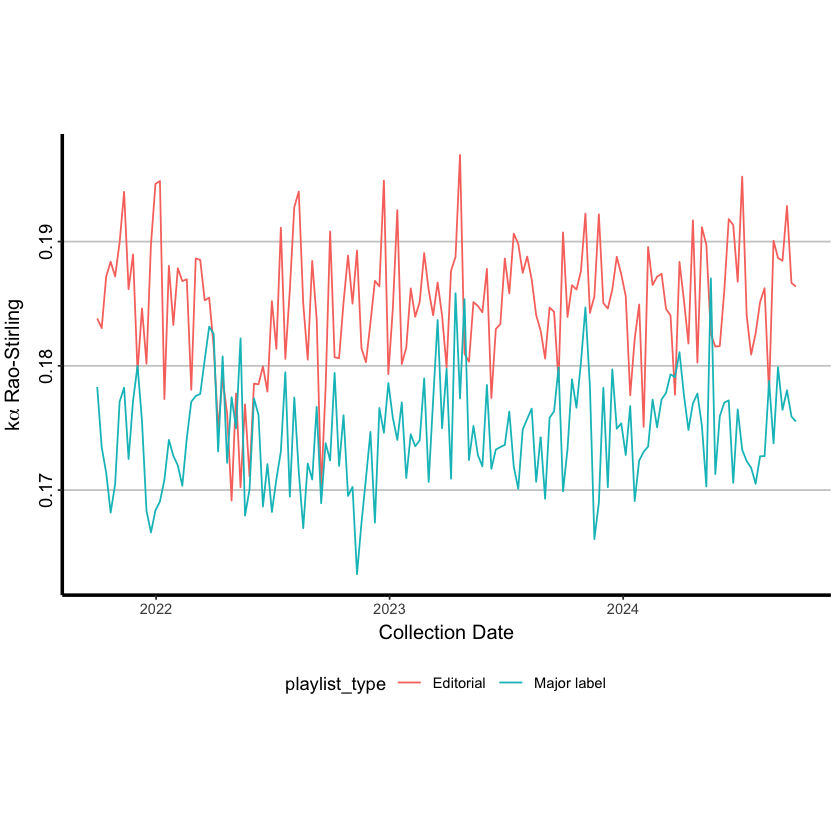

In [8]:
# Time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, playlist_type) %>%
  summarize(mean_stirling = mean(diversity_clean))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = playlist_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = expression(k*alpha*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_1_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.


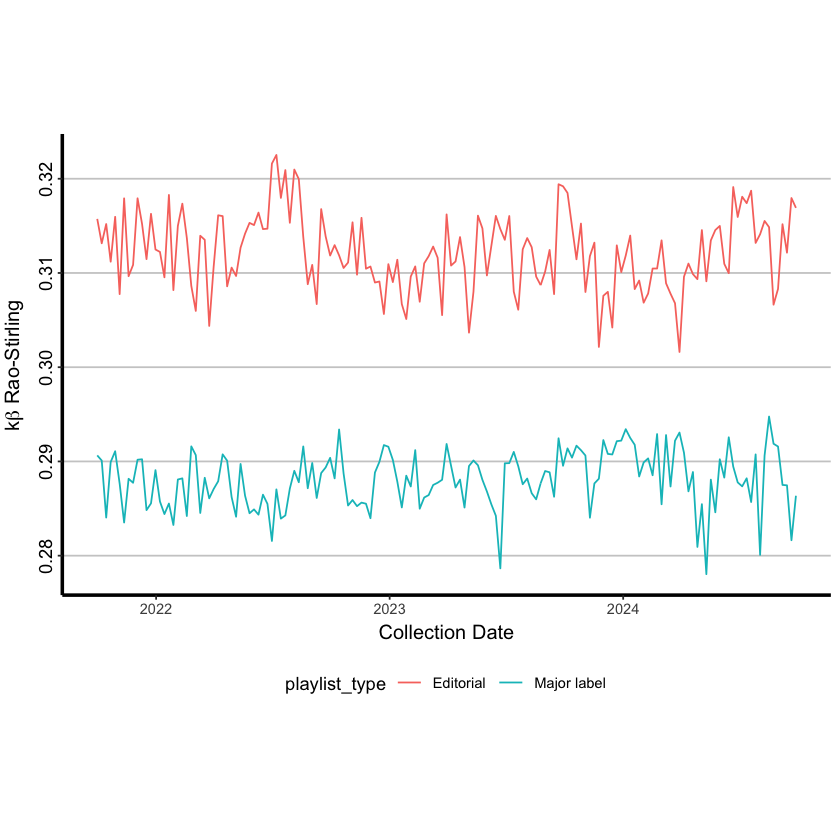

In [9]:
# Time series plot of stirling_index_2 vs collection_date
df_mean <- df %>%
  group_by(collection_date, playlist_type) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = playlist_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = expression(k*beta*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_2_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.


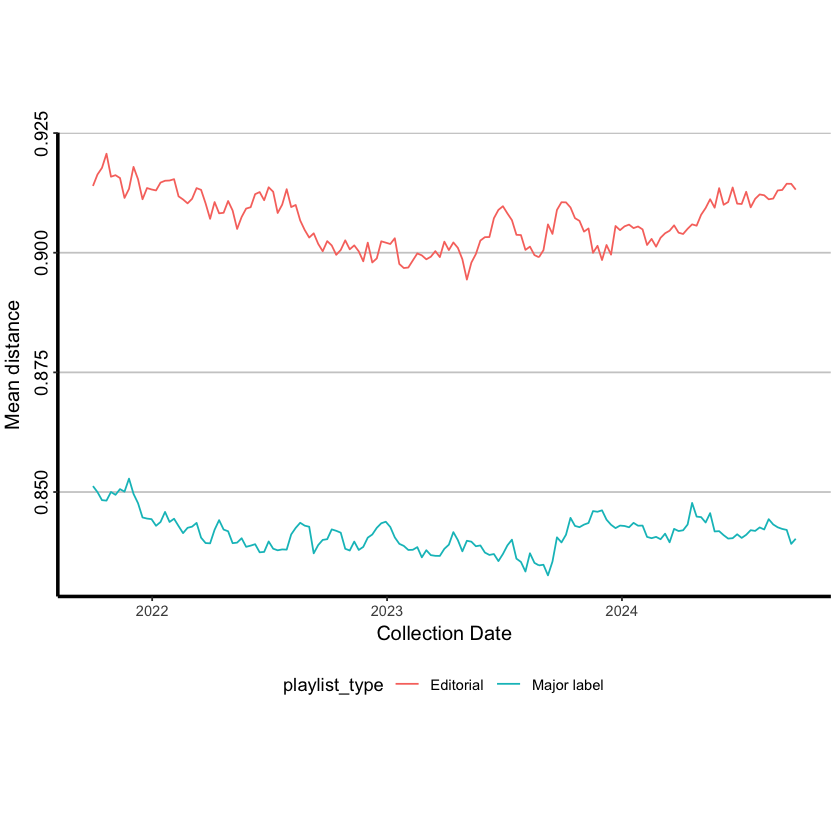

In [10]:
# Time series plot of dist_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, playlist_type) %>%
  summarize(mean_distances = mean(distances_3))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_distances,
    color = playlist_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = "Mean distance"
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_3_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


#### Editorial type

`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.


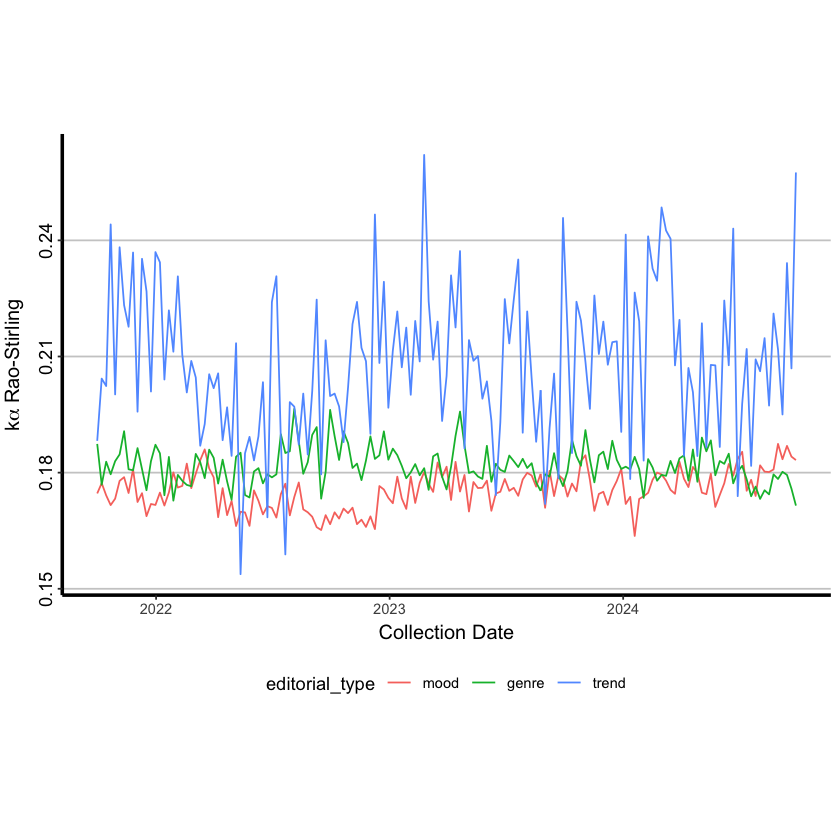

In [13]:
# Time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, editorial_type) %>%
  summarize(mean_stirling = mean(diversity_clean))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = editorial_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = expression(k*alpha*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_1_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.


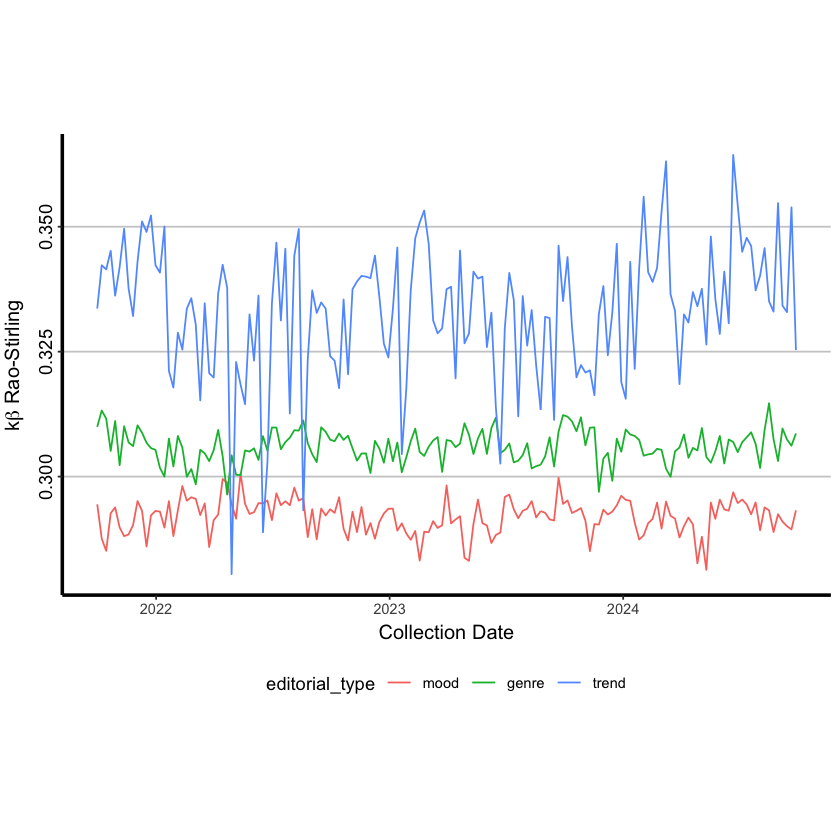

In [14]:
# Time series plot of stirling_index_2 vs collection_date
df_mean <- df %>%
  group_by(collection_date, editorial_type) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_stirling,
    color = editorial_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = expression(k*beta*" Rao-Stirling") #nolint
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_2_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


`summarise()` has grouped output by 'collection_date'. You can override using
the `.groups` argument.


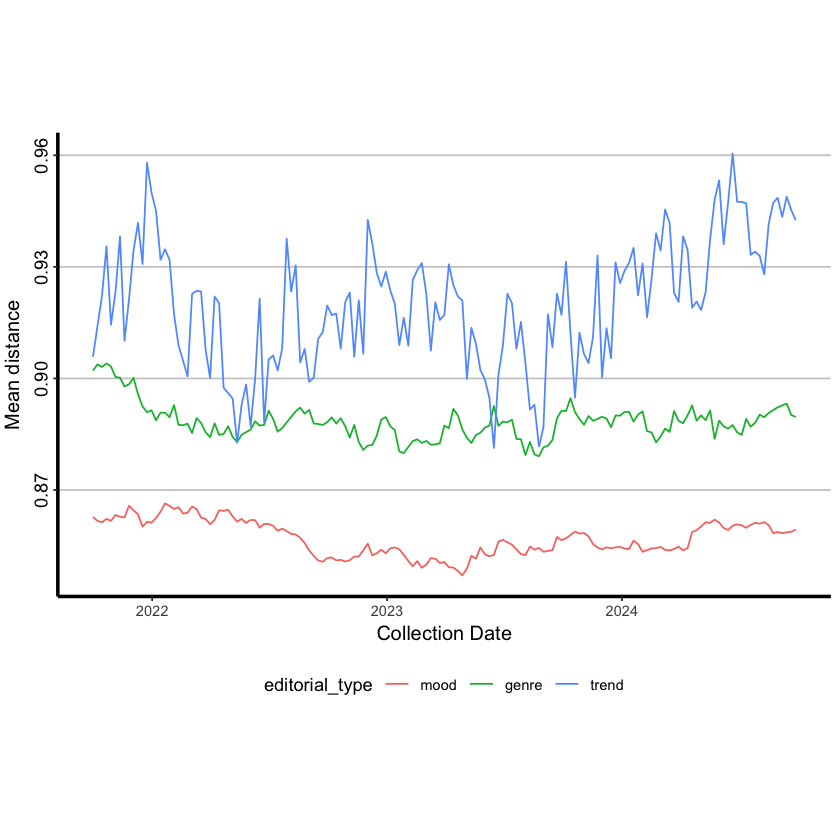

In [15]:
# Time series plot of distance_index vs collection_date
df_mean <- df %>%
  group_by(collection_date, editorial_type) %>%
  summarize(mean_distances = mean(distances_3))

ggplot(
  df_mean,
  aes(
    x = collection_date,
    y = mean_distances,
    color = editorial_type
  )
  ) +
  geom_line() +
  #geom_point() +
  labs(
    x = "Collection Date",
    y = "Mean distance"
  ) +
  theme(
    panel.background = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(color = "gray80"),
    axis.title.y = element_text(vjust = +2, size = 12),
    axis.title.x = element_text(vjust = 0.5, size = 12),
    axis.line.x = element_line(linewidth = 1, color = "black"),
    axis.line.y = element_line(linewidth = 1, color = "black"),
    axis.text.y = element_text(
      angle = 90,
      color = "black",
      size = 11,
      face = 1,
      hjust = 0.5
    ),
    aspect.ratio = 0.6,
    legend.position = "bottom"
  )

ggsave(
    "div_3_time_plot.png",
    width = 8,
    height = 5,
    dpi = 300
)


## Models

### OLS

In [12]:
model <- lm(
    diversity_norm ~ editorial_type + nb_tracks + playlist_date,
    data = df
)

summary(model)



Call:
lm(formula = diversity_norm ~ editorial_type + nb_tracks + playlist_date, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4185 -0.8328 -0.0433  0.7078  5.0746 

Coefficients:
                       Estimate Std. Error t value             Pr(>|t|)    
(Intercept)            0.213743   0.020370  10.493 < 0.0000000000000002 ***
editorial_typegenre    0.122168   0.015460   7.902  0.00000000000000289 ***
editorial_typetrend    0.586492   0.037481  15.648 < 0.0000000000000002 ***
nb_tracks             -0.005029   0.000165 -30.487 < 0.0000000000000002 ***
playlist_datebackline  0.165981   0.016752   9.908 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.967 on 18834 degrees of freedom
Multiple R-squared:  0.06291,	Adjusted R-squared:  0.06271 
F-statistic: 316.1 on 4 and 18834 DF,  p-value: < 0.00000000000000022


### FE time series

In [ ]:
# Optionally create a numeric 'time' variable (e.g., 'week_number') as above
library(plm)
df <- df %>%
  mutate(
    week_number = as.numeric(
        difftime(collection_date,
        min(collection_date),
        units = "weeks")
    )
  )
summary(df$week_number)

panel_data <- pdata.frame(df, index = c("playlist_name", "collection_date"))

model_fe <- plm(
    diversity_norm_2 ~ week_number + nb_tracks,
    data = panel_data,
    model = "within"
)
summary(model_fe)


In [ ]:
# Optionally create a numeric 'time' variable (e.g., 'week_number') as above
library(plm)
df <- df %>%
  mutate(
    week_number = as.numeric(
        difftime(collection_date,
        min(collection_date),
        units = "weeks")
    )
  )
summary(df$week_number)

panel_data <- pdata.frame(df, index = c("playlist_name", "collection_date"))

model_fe <- plm(
    dist_norm_3 ~ week_number * editorial_type + nb_tracks,
    data = panel_data,
    model = "within"
)
summary(model_fe)


### Secondary models

#### Playlist curator

In [ ]:
# Collapse data to playlist level
playlist_level_data <- df %>%
  group_by(playlist_name) %>%
  summarize(
    # Averaging track-level variables
    avg_track_popularity = mean(track__popularity, na.rm = TRUE),
    avg_artist_popularity = mean(artist_popularity, na.rm = TRUE),

    # Retaining playlist-level variables
    diversity_norm = unique(diversity_norm),
    diversity_norm_2 = unique(diversity_norm_2),
    dist_norm_3 = unique(dist_norm_3),
    log_followers = unique(log_followers),
    type = unique(type),
    curator = unique(playlist_curator),
    playlist_date = unique(playlist_date),
    nb_tracks = n(),
    .groups = "drop"
  )


In [ ]:
# Playlist curator alone
df_subset <- playlist_level_data %>%
  filter(curator != "charts")

df_subset$curator <- relevel(as.factor(df_subset$curator), ref = "spotify")

model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist curator and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_2_robust <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_2_robust, type = "text")

# OLS model playlist curator and distance
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_3_robust <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_3_robust, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_2_robust, model_3_robust)


In [ ]:
# Playlist curator vs charts
# OLS model playlist curator and diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist curator and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_2_robust <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_2_robust, type = "text")

# OLS model playlist curator and distance
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_3_robust <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_3_robust, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_2_robust, model_3_robust)


#### Playlist dates

In [ ]:
# Playlist dates
# OLS model playlist dates and diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist dates and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust_2 <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_robust_2, type = "text")

# OLS model playlist dates and distances
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust_3 <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_robust_3, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_robust_2, model_robust_3)
